# Explore here

In [39]:
import pandas as pd

df = pd.read_csv("../acea-data/Aquifer_Petrignano.csv")
df.head()




,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


▶ Dimensiones del dataset: (5223, 8)

▶ Tipos de datos:
Date                                     object
Rainfall_Bastia_Umbra                   float64
Depth_to_Groundwater_P24                float64
Depth_to_Groundwater_P25                float64
Temperature_Bastia_Umbra                float64
Temperature_Petrignano                  float64
Volume_C10_Petrignano                   float64
Hydrometry_Fiume_Chiascio_Petrignano    float64
dtype: object

▶ Valores nulos por columna:
Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

▶ Estadísticas descriptivas:
              Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
count         5223            4199.000000 

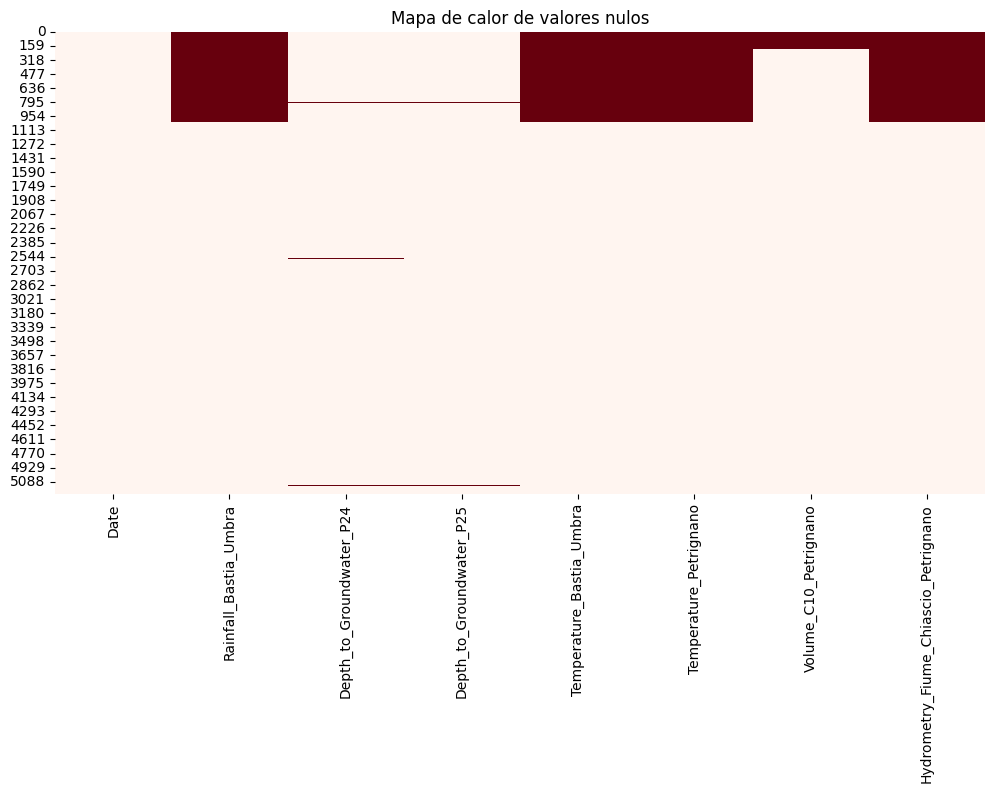

/tmp/ipykernel_4786/681553875.py:31: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


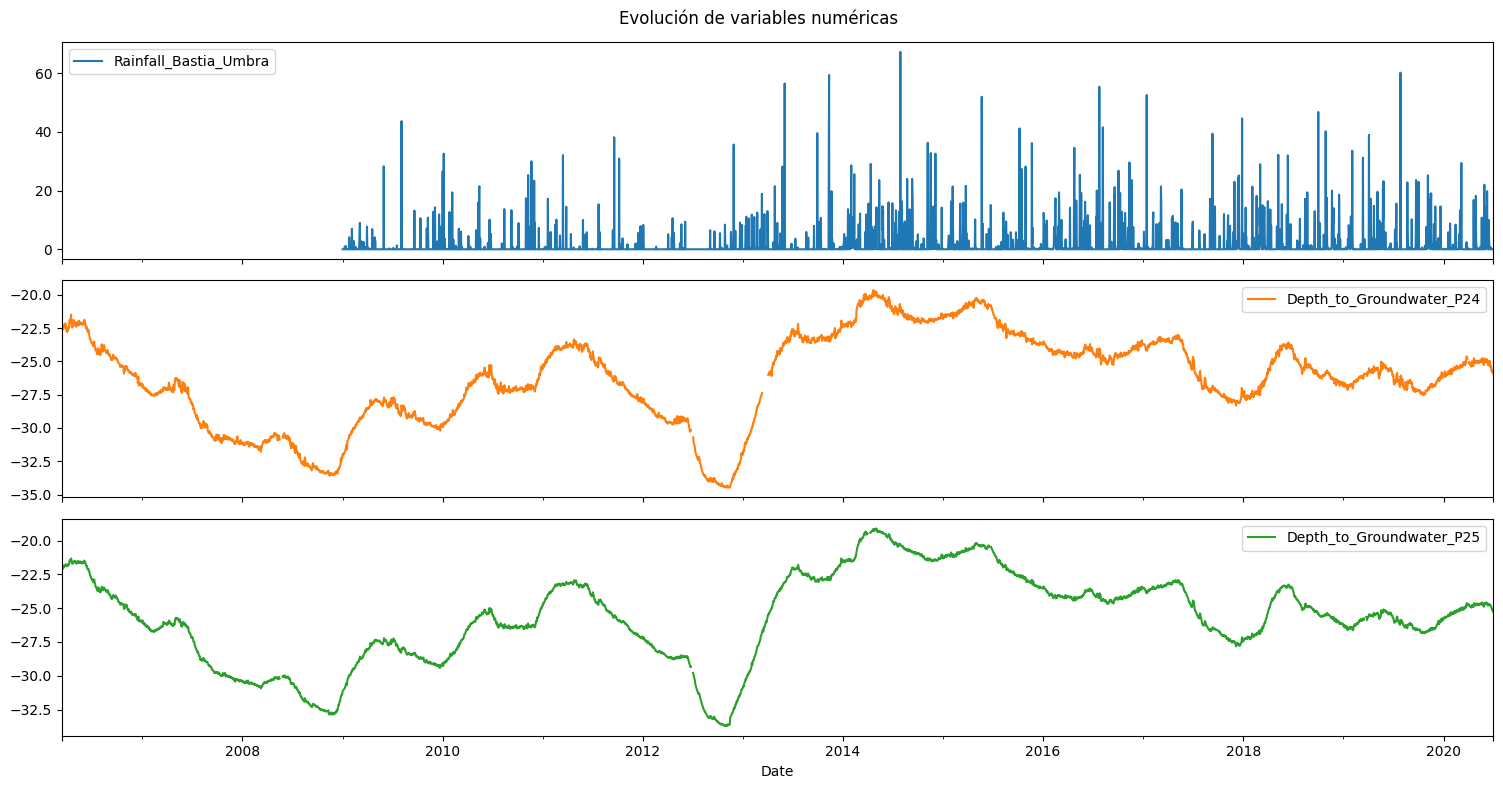

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../acea-data/Aquifer_Petrignano.csv")

print("▶ Dimensiones del dataset:", df.shape)


print("\n▶ Tipos de datos:")
print(df.dtypes)

print("\n▶ Valores nulos por columna:")
print(df.isnull().sum())


print("\n▶ Estadísticas descriptivas:")
print(df.describe(include='all'))


plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Mapa de calor de valores nulos")
plt.show()


if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)


    num_cols = df.select_dtypes(include='number').columns[:3]  # máximo 3 por claridad
    df[num_cols].plot(subplots=True, figsize=(15, 8), title="Evolución de variables numéricas")
    plt.tight_layout()
    plt.show()


In [41]:
df.head()
print("\nIndex:", df.index.name)
print("\nColumnas:", df.columns)



Index: Date

Columnas: Index(['Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')


In [ ]:
df_clean = df.fillna(method='ffill')


print("¿Quedan nulos?", df_clean.isnull().sum().sum())


¿Quedan nulos? 4293


/tmp/ipykernel_4786/1170529275.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df.fillna(method='ffill')


In [43]:
df_clean = df.dropna()

print("Filas tras eliminar nulos:", df_clean.shape[0])


Filas tras eliminar nulos: 4150


In [44]:
df_clean = df.ffill()
print("Nulos restantes:", df_clean.isnull().sum().sum())


Nulos restantes: 4293


In [ ]:
df_clean = df_clean.bfill() 


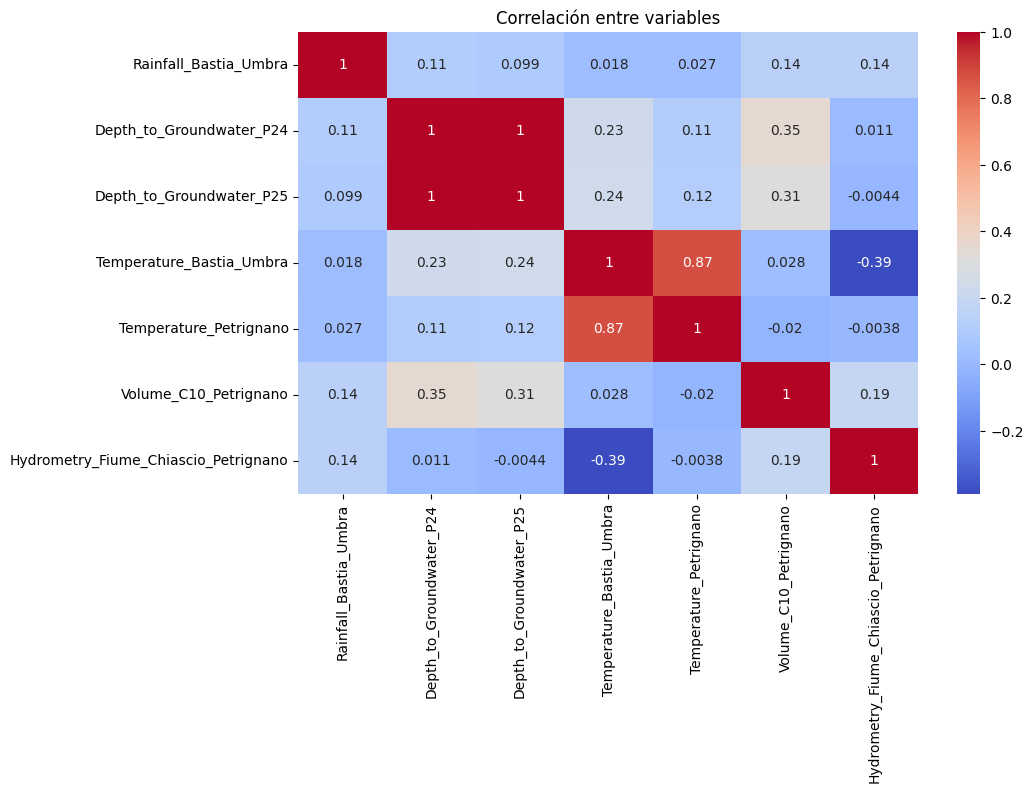

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()


In [ ]:
df_clean.index.name  
serie = df_clean['Volume_C10_Petrignano']


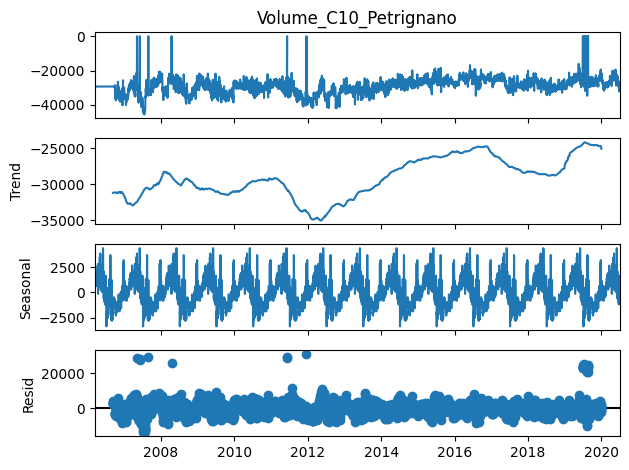

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(serie, model='additive', period=365)
decomp.plot()
plt.show()
df_clean['Volume_C10_Petrignano'] = df_clean['Volume_C10_Petrignano'] * -1


/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


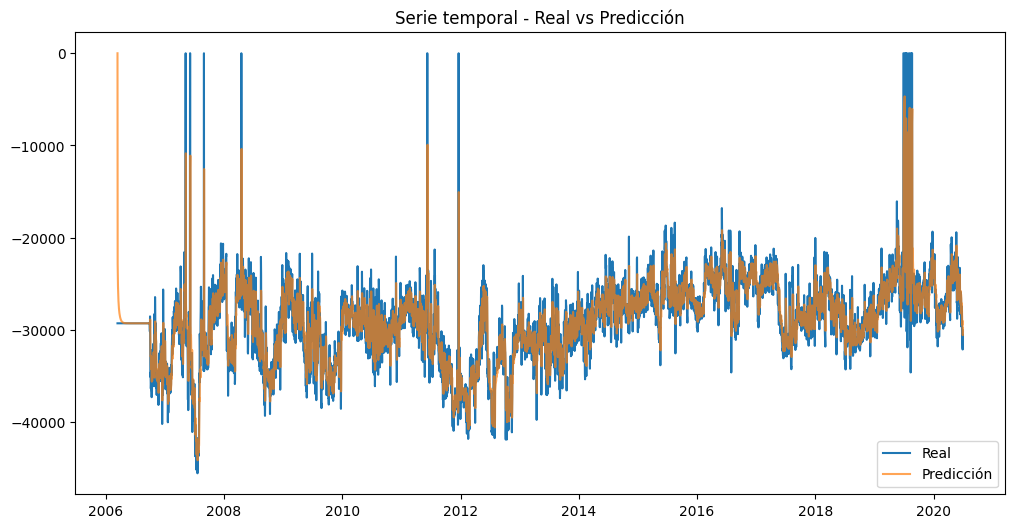

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


modelo = SARIMAX(serie, order=(1,1,1), seasonal_order=(0,0,0,0))  
resultado = modelo.fit()


pred = resultado.predict(start=0, end=len(serie)-1)


plt.figure(figsize=(12,6))
plt.plot(serie, label='Real')
plt.plot(pred, label='Predicción', alpha=0.7)
plt.legend()
plt.title("Serie temporal - Real vs Predicción")
plt.show()


In [50]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(serie, pred)
print("MSE:", mse)


MSE: 6614679.204934045


In [ ]:

df_clean.index = pd.to_datetime(df_clean.index)

# Entrenamiento: hasta fin de 2019
train = df_clean[:'2019']
test = df_clean['2020':]

# Variables objetivo
y_train = train['Volume_C10_Petrignano']
y_test = test['Volume_C10_Petrignano']


exog_vars = ['Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra', 'Hydrometry_Fiume_Chiascio_Petrignano']
X_train = train[exog_vars]
X_test = test[exog_vars]


In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Entrenar modelo SARIMAX con exógenas
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0))
results = model.fit(disp=False)


/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [53]:
# Predicción para el mismo rango de test
pred = results.predict(start=test.index[0], end=test.index[-1], exog=X_test)


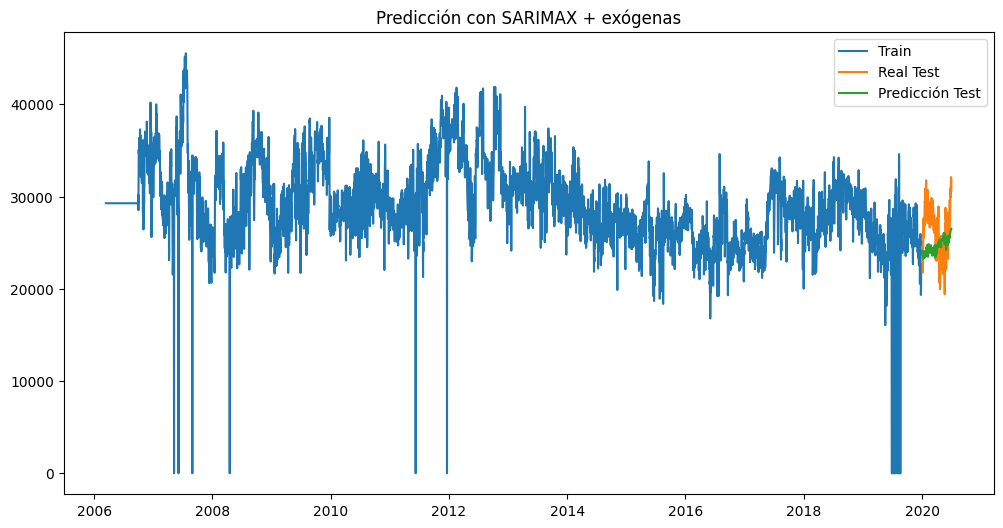

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Real Test')
plt.plot(pred.index, pred, label='Predicción Test')
plt.title("Predicción con SARIMAX + exógenas")
plt.legend()
plt.show()


In [55]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, pred))
print("R² :", r2_score(y_test, pred))


MSE: 10984308.641556842
R² : -0.5421672313848716


predecir 30 días hacia el futuro usando el modelo SARIMAX

In [ ]:

exog_vars = ['Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra', 'Hydrometry_Fiume_Chiascio_Petrignano']

# Entrenamiento con todo el dataset
y_full = df_clean['Volume_C10_Petrignano']
X_full = df_clean[exog_vars]

# Modelo completo
model_full = SARIMAX(y_full, exog=X_full, order=(1,1,1), seasonal_order=(0,0,0,0))
results_full = model_full.fit(disp=False)


/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
import pandas as pd

# Crear rango de fechas futuras
future_dates = pd.date_range(start=df_clean.index[-1] + pd.Timedelta(days=1), periods=30)

# Crear exógenas simuladas con el último valor observado 
last_values = df_clean[exog_vars].iloc[-1]
X_future = pd.DataFrame([last_values] * 30, columns=exog_vars, index=future_dates)


In [58]:
pred_future = results_full.predict(start=len(y_full), end=len(y_full)+29, exog=X_future)


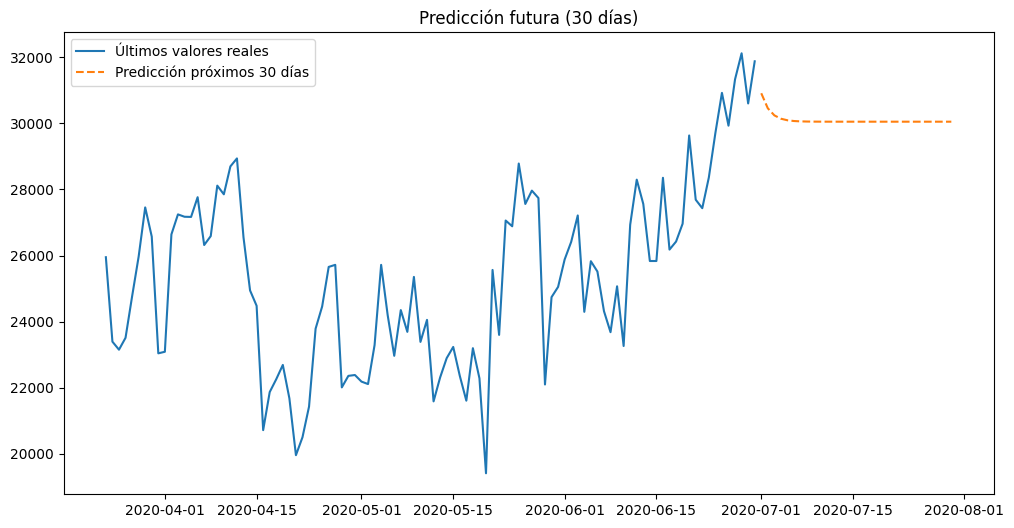

In [59]:
plt.figure(figsize=(12,6))
plt.plot(y_full[-100:], label='Últimos valores reales')
plt.plot(pred_future, label='Predicción próximos 30 días', linestyle='--')
plt.title("Predicción futura (30 días)")
plt.legend()
plt.show()
